#**TalentoTECH**


**Análisis de datos - Integrador**

**Beneficiario: Andres Fernando Ruales Muñoz**

**Popayán - Cauca**

**23 de Mayo del 2024**

#**Análisis de datos con regresion lineal y clustering usando KMeans con el  Dataset de Obesidad**

#**1. Planteamiento del problema**

Mi caso de estudio  es sobre la obesidad para segmentar los grupos según características como la altura y el peso que podrían indicarnos una forma de clasificar su nivel de obesidad y tendra como objetivos:
- Realizar EDA sobre relaciones según clasificación de edades, genero, etc.
- Identificar grupos de pacientes con características similares como altura y peso para realizar clasificación entre estas personas.

Este dataset se extrae de la página web de kaggle


*   https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/download?datasetVersionNumber=1

#**2. Variables del Dataset**

*   **Gender:** Genero de las personas
*   **Age:** Edad de las personas


*   **Height:** Altura de las personas

*   **Weight:** Peso de las personas

*   **family_history_with_overweight:** Alguna persona de su familia ha tenido o sufrido de sobrepeso

*   **FAVC:** Consumes alimentos caloricos frecuentemente

*   **FCVC:** Usualmente consumes vegetales en tus comidas
*  **NCP:** Cuantas comidas haces en el dia


*   **CAEC:** Consumes mas alimentos entre horas


*   **SMOKE:** ¿Fumas?


*   **CH2O:** Cuantas veces bebes agua en el dia


*   **SCC:** Controlas cuantas calorias ingieres en el dia

*   **FAF:** Con que frecuencia realizas actividad fisica en el dia

*   **TUE:** Cuantas horas gastas usando aparatdos electronicos

*   **CALC:** Con que frecuencia bebes alcohol
*   **MTRANS:** En que te transportas hacie tu destino


*   **NObeyesdad:** Nivel de obesidad








#**2.1 Clasificacion de variables:**


**Variables numéricas:**

* Age
* Height
* Weight
* FCVC
* CH2O
* NCP
* FAF
* TUE





**Variables categóricas:**
* Gender
* family_history_with_overweight
* FAVC
* CAEC
* SMOKE
* SCC
* CALC

#**3. Importamos las librerias necesarias para realizar nuestro estudio.**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans



#**4. Importar Datos**

Leemos nuestro Dataset que lo hemos descargado de la pagina web de Kaggle

In [ ]:
df_obesidad=pd.read_csv("/content/ObesityDataSet.csv")


Ahora vamos a observar los registros y las columnas de las que disponemos:

In [ ]:
#Con estos comandos mostramos todos los registros del dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_obesidad


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.000000,3.000000,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.000000,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.000000,1.620000,53.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
6,Female,23.000000,1.500000,55.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Motorbike,Normal_Weight
7,Male,22.000000,1.640000,53.000000,no,no,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.000000,1.780000,64.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
9,Male,22.000000,1.720000,68.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,no,Public_Transportation,Normal_Weight


In [ ]:
df_obesidad.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df_obesidad.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


#**5. Análisis Exploratorio de Datos**

In [ ]:
# Visualizar info del DataFrame df_mobile_market
df_obesidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
#Tipo de datos
df_obesidad.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
# Acceder al número de filas y columnas por separado
print("Número de filas:", df_obesidad.shape[0])
print("Número de columnas:", df_obesidad.shape[1])

Número de filas: 2111
Número de columnas: 17


In [ ]:
# Revisar valores vacios
df_obesidad.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
# Revisar valores duplicados
df_obesidad.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [ ]:
df_obesidad.duplicated().sum()

24

In [ ]:
#Revisar cuantos valores unicos hay
df_obesidad.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [ ]:
#Visualizar las descripciones estadisticas de las variables numericas
df_obesidad.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
#Visualizar las descripciones estadisticas de las variables categoricas
df_obesidad.describe(include=['object'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


Debemos tener en cuenta que los datos que me proporciona describe() para las variables categóricas cambian un poco:


*   **count:** El número total de valores no nulos en la columna.
*   **unique:** El número de valores únicos en la columna.
*   **top:** El valor más frecuente en la columna.
*   **freq:** La frecuencia del valor más común en la columna.



**Comentarios:**


*   El Dataframe posee 2111 registros.
*   Si analizamos el promedio de edad es de 24 años.
*   El promedio de estatura y peso es de 1.70 m y 86.58 kg respectivamente.
*   El máximo peso registrado es de 173 kg.
*   No tiene registros vacios o nulos.
*   Tiene 24 datos duplicados, lo cual es el normal teniendo en cuenta que puede haber la posibilidad de que algunas personas tengan similitudes en su peso, edad, altura, entre otros datos.
*   El valor mas frecuente en el dataset en la columna de género es Male("hombre").
*   En la columna del SMOKE ("si fuma o no"), la respuesta mas frecuente fue "no".



#**6. Visualización de datos**

A continuación, se muestra como esta dividida mi población de estudio en cuanto al genero y se puede ver que es muy parejo el numero de Hombres como de mujeres en mi dataset.

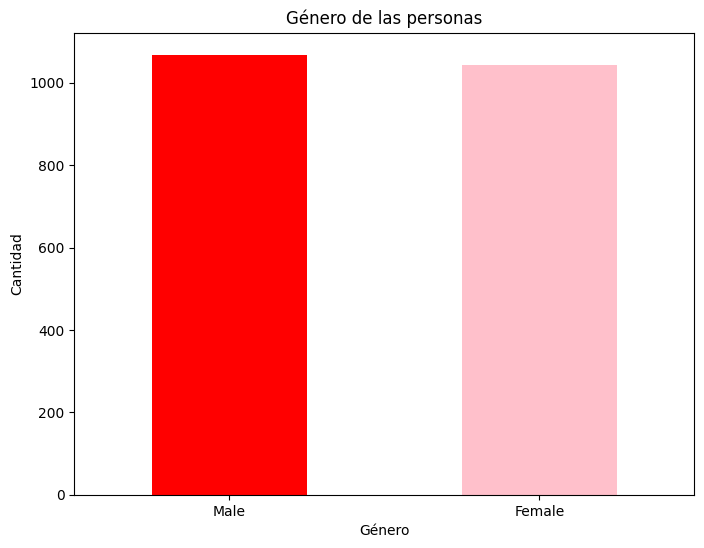

Hay 1068 personas de género Masculino.
Hay 1043 personas de género Femenino.


In [ ]:
contador_genero = df_obesidad['Gender'].value_counts()

plt.figure(figsize=(8, 6))
contador_genero.plot(kind='bar', color=['red', 'pink'])
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Género de las personas')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.show()

generos = contador_genero.index.tolist()
cantidades = contador_genero.values.tolist()

for i in range(len(generos)):

    if generos[i] == 'Female':
        genero_imprimir = 'Femenino'
    elif generos[i] == 'Male':
        genero_imprimir = 'Masculino'
    else:
        genero_imprimir = generos[i]

    print(f"Hay {cantidades[i]} personas de género {genero_imprimir}.")

**Veamos ahora la distribucion de las edades**

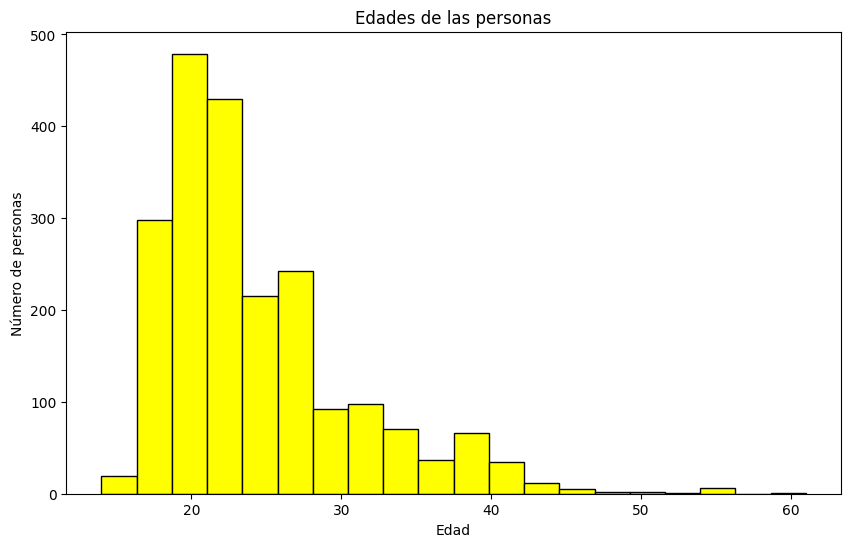

In [ ]:
# Crear el histograma de edades
plt.figure(figsize=(10, 6))
plt.hist(df_obesidad['Age'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Número de personas')
plt.title('Edades de las personas')
plt.show()

Nuerstro dataset muestra una fuerte presencia de personas con edades comprendidas entre los 20 a los 23 años.

**Distribución del peso**

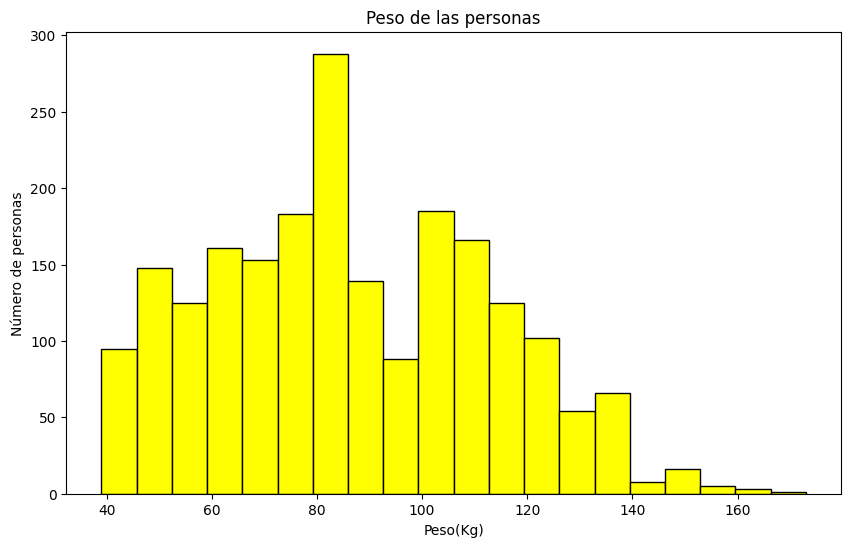

In [ ]:
# Crear el histograma de pesos
plt.figure(figsize=(10, 6))
plt.hist(df_obesidad['Weight'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('Peso(Kg)')
plt.ylabel('Número de personas')
plt.title('Peso de las personas')
plt.show()

Se muestra que el promedio de personas con peso de 80 kg es bastante fuerte.

**Distribucion del peso**

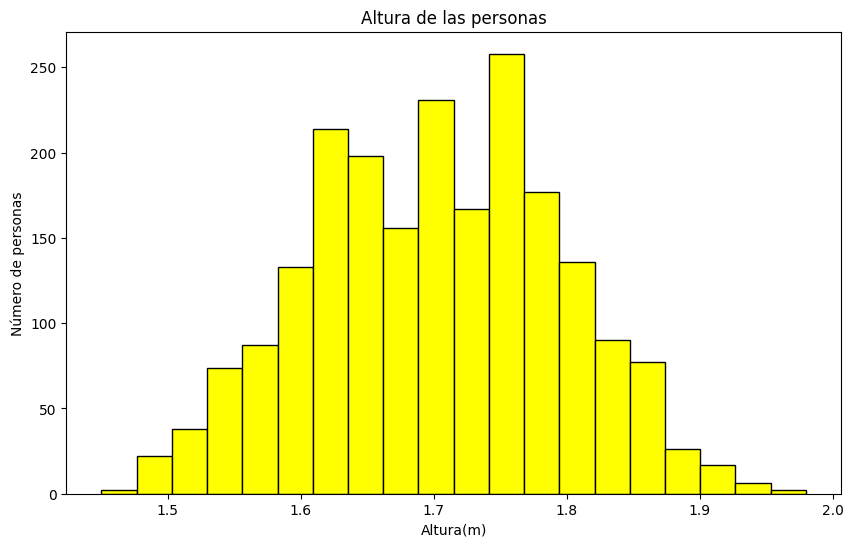

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_obesidad['Height'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('Altura(m)')
plt.ylabel('Número de personas')
plt.title('Altura de las personas')
plt.show()

Alta presencia de personas con estatura media de 1.78 m en este dataset.

**Diagrama de caja para la Edad, Altura y Peso**

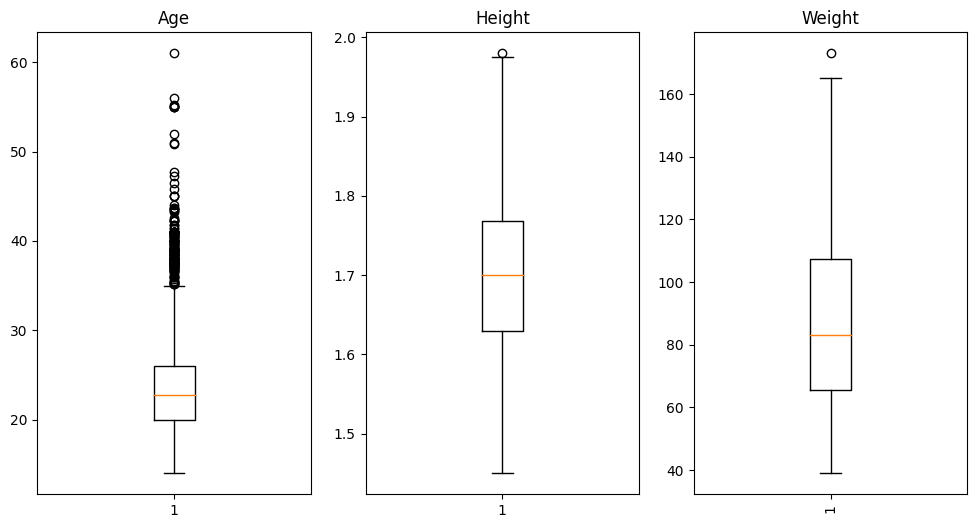

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
pos = 0

for column in ['Age', 'Height', 'Weight']:
    axs[pos].boxplot(df_obesidad[column])
    axs[pos].set_title(f'{column}')
    plt.xticks(rotation = 90)
    pos += 1
plt.show()

**Comentarios:**


*   Para la edad tenemos que la caja que es quien representa el 50% de los datos se ubica entre 20 años y 27 años, esto quiero decir que son los datos mas predominantes de mi dataset para esta variable, ademas observamos por la linea horizontal que es la mediana el dato mas predominante es 24 años y los puntos en los extremos son valores atipicos o simplemente que no tiene una frecuena de repeticion muy alta esta la edad de los 60 años.
*   En la altura nuestra caja se situa en el rango de 1,63 m a 1,77 m que representa el 50% de los datos de nuestro dataset, la linea horizontal que representa la media esta en la altura de 1,70 m lo que quiere decir que hay muchas personas que tienen esta altura en mi dataset y como valores atipicos por mis extremos tenemos a 1,97 m como el valor menos repetido del dataset.
*   Tenemos que el peso situa la caja en el rango de 68kg a 107 kg como el 50% de lso datos que mas se repiten en mi dataset, la media de este se situa en 83 kg y como valores atipico tenemos numeros que van mas alla de 170 kg lo cual es alarmante.



**Comparación del peso y la altura para los generos masculino y femenino**

Text(0, 0.5, 'Peso(kg)')

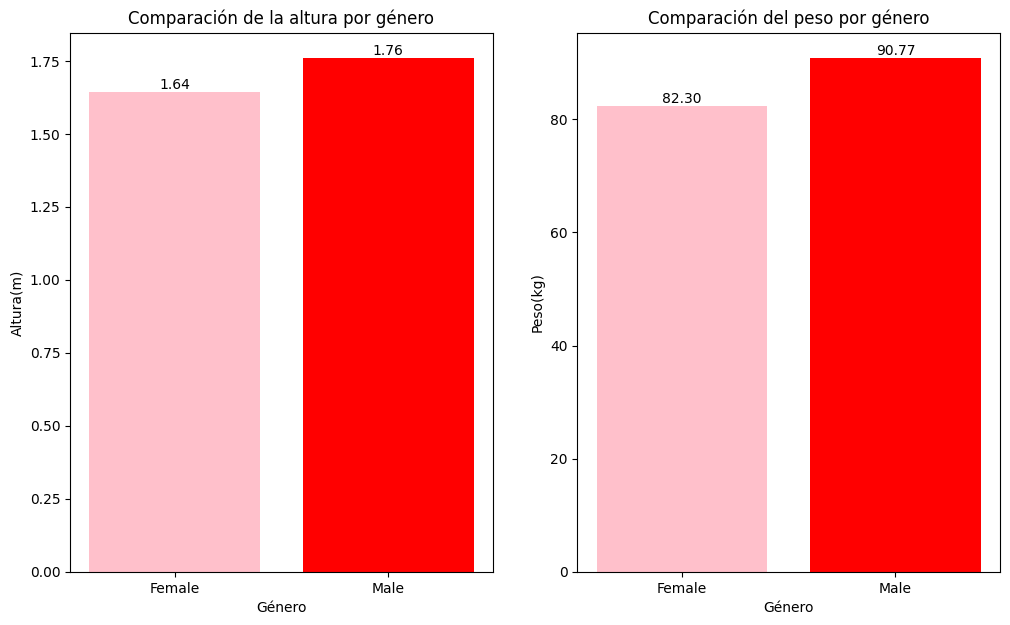

In [ ]:
gender_height = df_obesidad.groupby('Gender')['Height'].mean()
gender_weight = df_obesidad.groupby('Gender')['Weight'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12,7))

bar0 = ax[0].bar(x= gender_height.index, height = gender_height, color = ['pink', 'red'])
ax[0].bar_label(bar0, fmt='%.2f')
ax[0].set_title('Comparación de la altura por género')
ax[0].set_xlabel('Género')
ax[0].set_ylabel('Altura(m)')

bar1 = ax[1].bar(x= gender_weight.index, height = gender_weight, color = ['pink', 'red'])
ax[1].bar_label(bar1, fmt='%.2f')
ax[1].set_title('Comparación del peso por género')
ax[1].set_xlabel('Género')
ax[1].set_ylabel('Peso(kg)')



*   Para el primer gráfico tenemos que la media de altura para las mujeres es de 1.64m y para los hombres es de 1,76m.
*   Para el segundo gráfico, que nos muestra el peso, las mujeres tienen una media de 82.30 kg y para los hombres de 90.77 kg.



**Personas con historial familiar con obesidad**

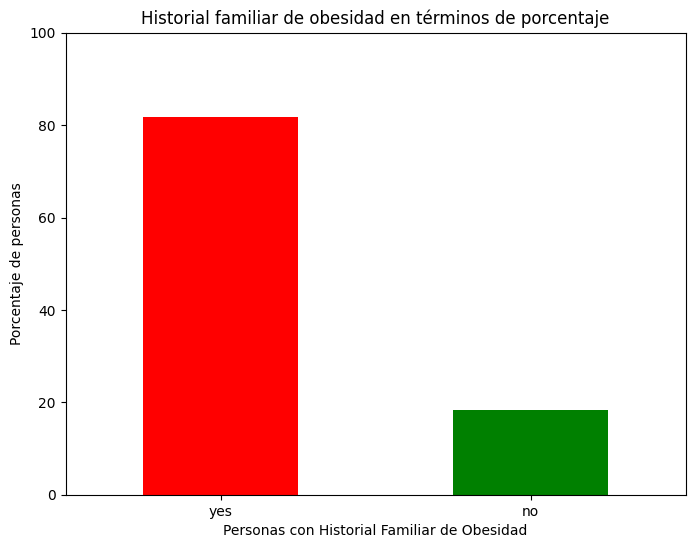

In [ ]:
family_history_percentage = df_obesidad['family_history_with_overweight'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
family_history_percentage.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Personas con Historial Familiar de Obesidad')
plt.ylabel('Porcentaje de personas')
plt.title('Historial familiar de obesidad en términos de porcentaje')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.ylim(0, 100)  # Establecer el límite del eje y de 0 a 100
plt.show()

Si analizamos este gráfico podemos observar que mas del 80% de personas afirman haber tenido uno o varios casos de obesidad en el historial de su familia, dato que es alarmante.

**Personas que consumen alimentos ricos en calorias**

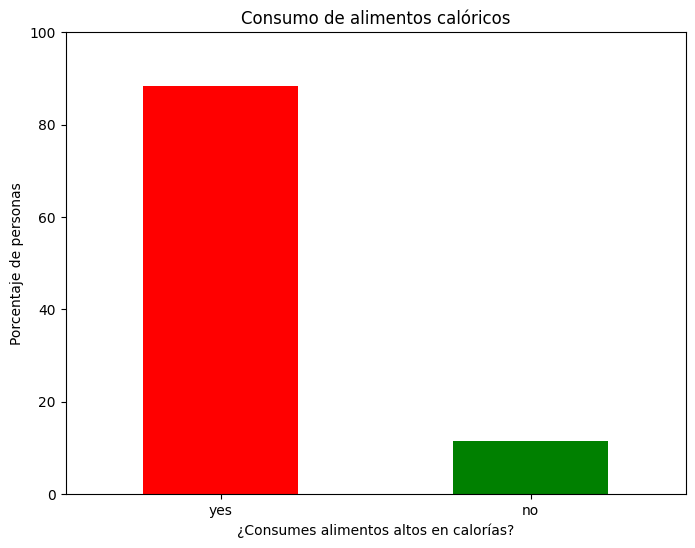

In [ ]:
favc_perc = df_obesidad['FAVC'].value_counts(normalize=True) * 100

# Crear el gráfico de barras con los porcentajes
plt.figure(figsize=(8, 6))
favc_perc.plot(kind='bar', color=['red', 'green'])
plt.xlabel('¿Consumes alimentos altos en calorías?')
plt.ylabel('Porcentaje de personas')
plt.title('Consumo de alimentos calóricos')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.ylim(0, 100)  # Establecer el límite del eje y de 0 a 100
plt.show()



Mas del 85% de las personas afirman consumir alimentos altos en calorias con frecuencia, lo cual nos da indicios de una de las posibles causas de la obesidad en algunas personas del dataset.

**Personas que consumen alimentos entre horas**

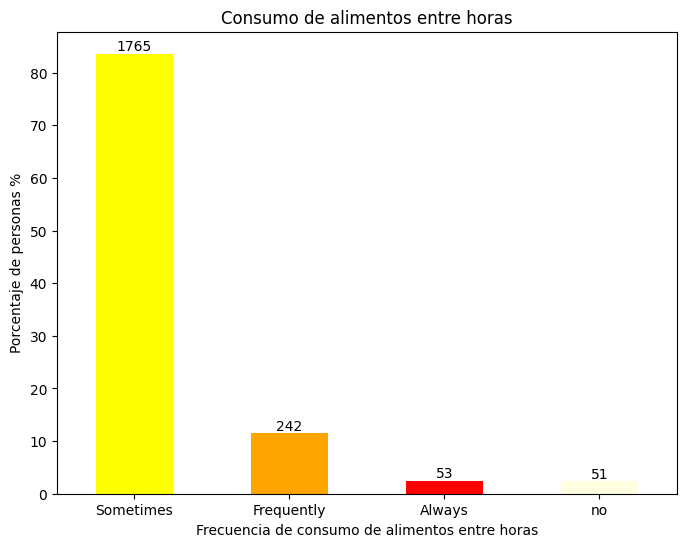

In [ ]:
caec_counts = df_obesidad['CAEC'].value_counts()
caec_percentage = df_obesidad['CAEC'].value_counts(normalize=True) * 100

# Crear el gráfico de barras con los porcentajes y las etiquetas de número de personas
plt.figure(figsize=(8, 6))
ax = caec_percentage.plot(kind='bar', color=['yellow', 'orange', 'red', 'lightyellow'])

for i in range(len(caec_counts)):
    plt.text(i, caec_percentage[i], f'{caec_counts[i]}', ha='center', va='bottom')

plt.xlabel('Frecuencia de consumo de alimentos entre horas')
plt.ylabel('Porcentaje de personas %')
plt.title('Consumo de alimentos entre horas')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.show()

Un poco mas del 80% tiene el habito de consumir algunas veces alimentos entre comidas, mientras que menos del 3% dice que no come entre comidas. Por lo que inferimos que es una practica normal entre las personas pero deben tener cuidado con lo que ingieren en cuestion de la tabla nutricional de los alimentos.

**Personas que controlan su ingesta calórica**

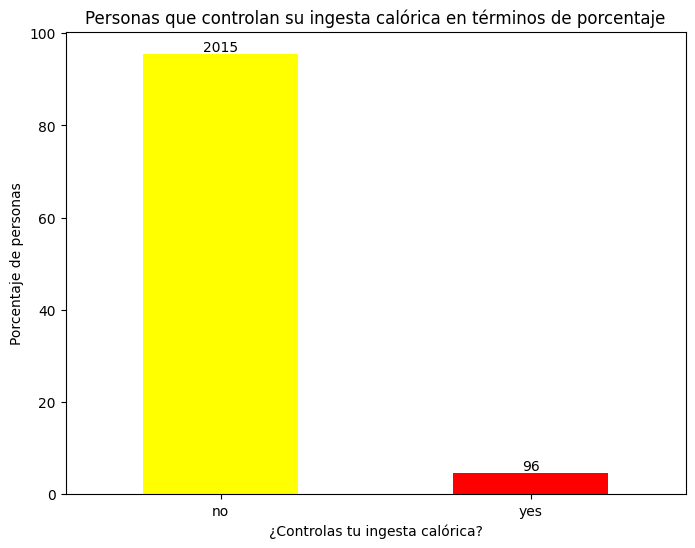

In [ ]:
scc_counts = df_obesidad['SCC'].value_counts()
scc_percentage = df_obesidad['SCC'].value_counts(normalize=True) * 100

# Crear el gráfico de barras con los porcentajes
plt.figure(figsize=(8, 6))
ax = scc_percentage.plot(kind='bar', color=['yellow', 'red'])

for i in range(len(scc_counts)):
    plt.text(i, scc_percentage[i], f'{scc_counts[i]}', ha='center', va='bottom')

plt.xlabel('¿Controlas tu ingesta calórica?')
plt.ylabel('Porcentaje de personas')
plt.title('Personas que controlan su ingesta calórica en términos de porcentaje')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.show()

Este gráfico es alarmante, nos muestra que mas del 90% de los encuestados no tienen en cuenta las calorias que ingieren en todo el dia. Unos de los factores mas relacionados con el aumento de peso es el consumo excesivo de calorías de las que tu cuerpo quema, ya que el exceso se almacenará como grasa corporal, lo que puede llevar a un aumento de peso.

**Personas fumadoras**

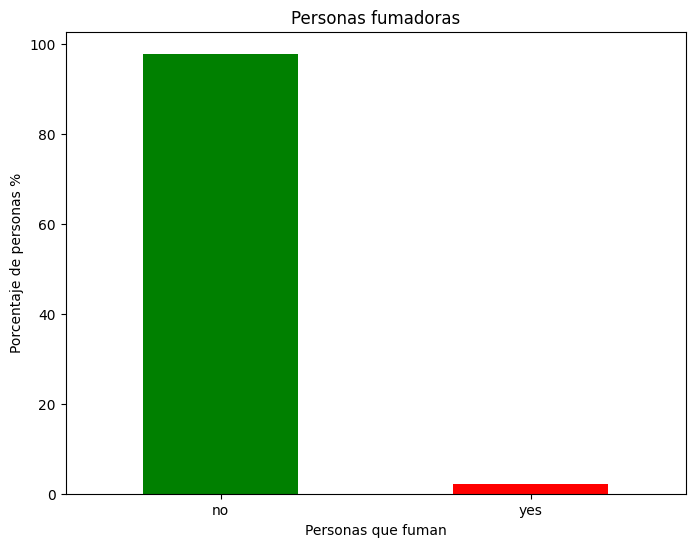

In [ ]:
smoke_percentage = df_obesidad['SMOKE'].value_counts(normalize=True) * 100

# Crear el gráfico de barras con los porcentajes y las etiquetas de número de personas
plt.figure(figsize=(8, 6))
ax = smoke_percentage.plot(kind='bar', color=['green', 'red'])

plt.xlabel('Personas que fuman')
plt.ylabel('Porcentaje de personas %')
plt.title('Personas fumadoras')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.show()

Es interesante ver como mas del 90% de las personas que fueron entrevistadas afirman que no son fumadores.

**Personas que con frecuencia ingieren bebidas alcoholicas**

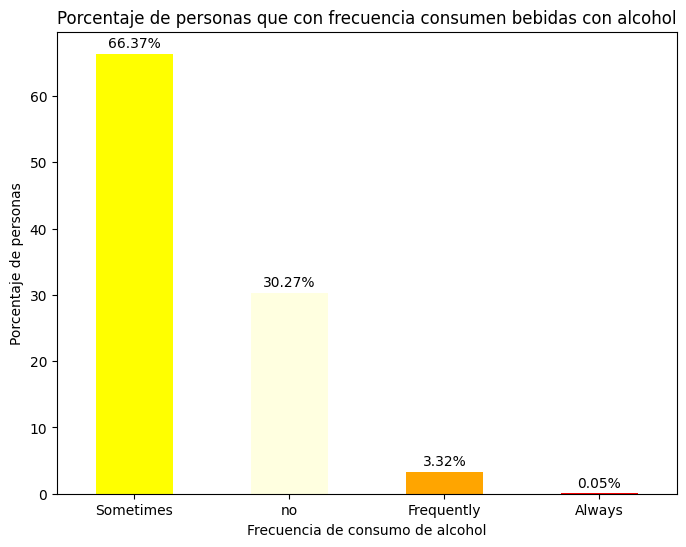

In [ ]:
porcentajes = df_obesidad['CALC'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
porcentajes.plot(kind='bar', color=['yellow', 'lightyellow', 'orange', 'red'])

plt.xlabel('Frecuencia de consumo de alcohol')
plt.ylabel('Porcentaje de personas')
plt.title('Porcentaje de personas que con frecuencia consumen bebidas con alcohol')

plt.gca().set_xticklabels(porcentajes.index, rotation=0)

for i, porcentaje in enumerate(porcentajes):
    plt.text(i, porcentaje + 0.5, f'{porcentaje:.2f}%', ha='center', va='bottom')

plt.show()

Mas del 66% del dataset eligieron la categoria "sometimes" indicando que para la mayoría de las personas encuestadas, el consumo de bebidas alcohólicas es un comportamiento esporádico en lugar de algo que hacen con frecuencia.

**Gráfico de caja para el peso en relacion a la frecuencia de consumo de alcohol:**

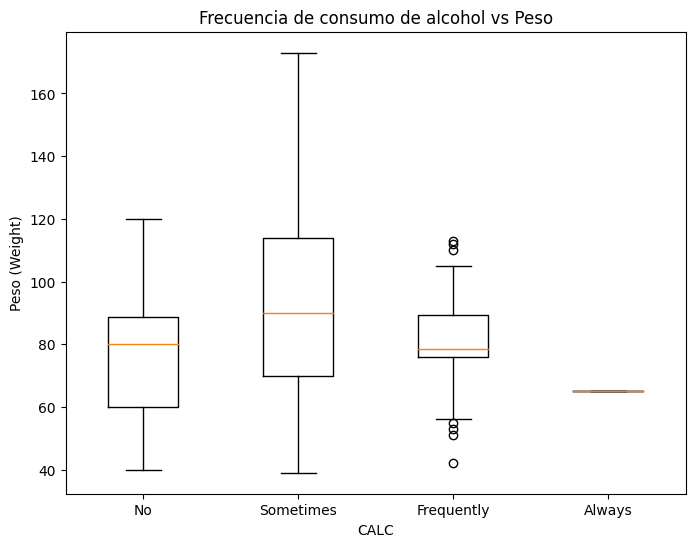

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([df_obesidad[df_obesidad['CALC'] == 'no']['Weight'],
             df_obesidad[df_obesidad['CALC'] == 'Sometimes']['Weight'],
             df_obesidad[df_obesidad['CALC'] == 'Frequently']['Weight'],
             df_obesidad[df_obesidad['CALC'] == 'Always']['Weight']],
            labels=['No', 'Sometimes', 'Frequently', 'Always'])
plt.xlabel('CALC')
plt.ylabel('Peso (Weight)')
plt.title('Frecuencia de consumo de alcohol vs Peso')
plt.show()

Podemos ver que hay un gran numeros de personas que dicen tomar bebidas alcoholicas en algunas ocasiones, ya que la distancia de la caja es grande y tiene cierta relación con el peso de las personas pero no es muy diciente analizarlo de esta forma.

**Grafico de dispersion de las personas teniendo en cuenta su peso en relacion a su edad**

In [ ]:
age_weight=df_obesidad.groupby(['Age']).agg({'Weight': 'mean'}).reset_index()
px.scatter(age_weight, x='Age', y='Weight', title='Peso vs Edad',color_discrete_sequence=['#44899b'])

**Gráfico de dispersión de las personas teniendo en cuenta su peso en relación a su altura**


In [ ]:
height_weight = df_obesidad.groupby(['Height']).agg({'Weight': 'mean'}).reset_index()
px.scatter(height_weight, x='Height', y='Weight', title='Peso vs Altura',color_discrete_sequence=['#44899b'])


**Gráfico de dispersión de las personas teniendo en cuenta su frecuencia de actividad fisica en relación a su peso:**


In [ ]:
faf_weight = df_obesidad.groupby(['FAF']).agg({'Weight': 'mean'}).reset_index()
px.scatter(faf_weight, x='FAF', y='Weight', title='Frecuencia de actividad física vs Peso',color_discrete_sequence=['#44899b'])

**Transformando mis variables categoricas a numericas para poder realizar la matriz de correlacion.**

In [ ]:
df_obesidad['Gender'].replace(['Male', 'Female'],[0,1],inplace=True)

# Columns with 'no', 'Sometimes', 'Frequently', 'Always'
for column in ['CALC', 'CAEC']:
    df_obesidad[column].replace(['no', 'Sometimes', 'Frequently', 'Always'],[0,1,2,3],inplace=True)

# Binary columns
for column in ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']:
    df_obesidad[column].replace(['no', 'yes'],[0,1],inplace=True)

df_obesidad['MTRANS'].replace(['Walking','Public_Transportation', 'Bike', 'Motorbike', 'Automobile'],[0,1,2,3,4],inplace=True)
df_obesidad['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],[0,1,2,3,4,5,6],inplace=True)

**Matriz de correlacion:**

<Axes: >

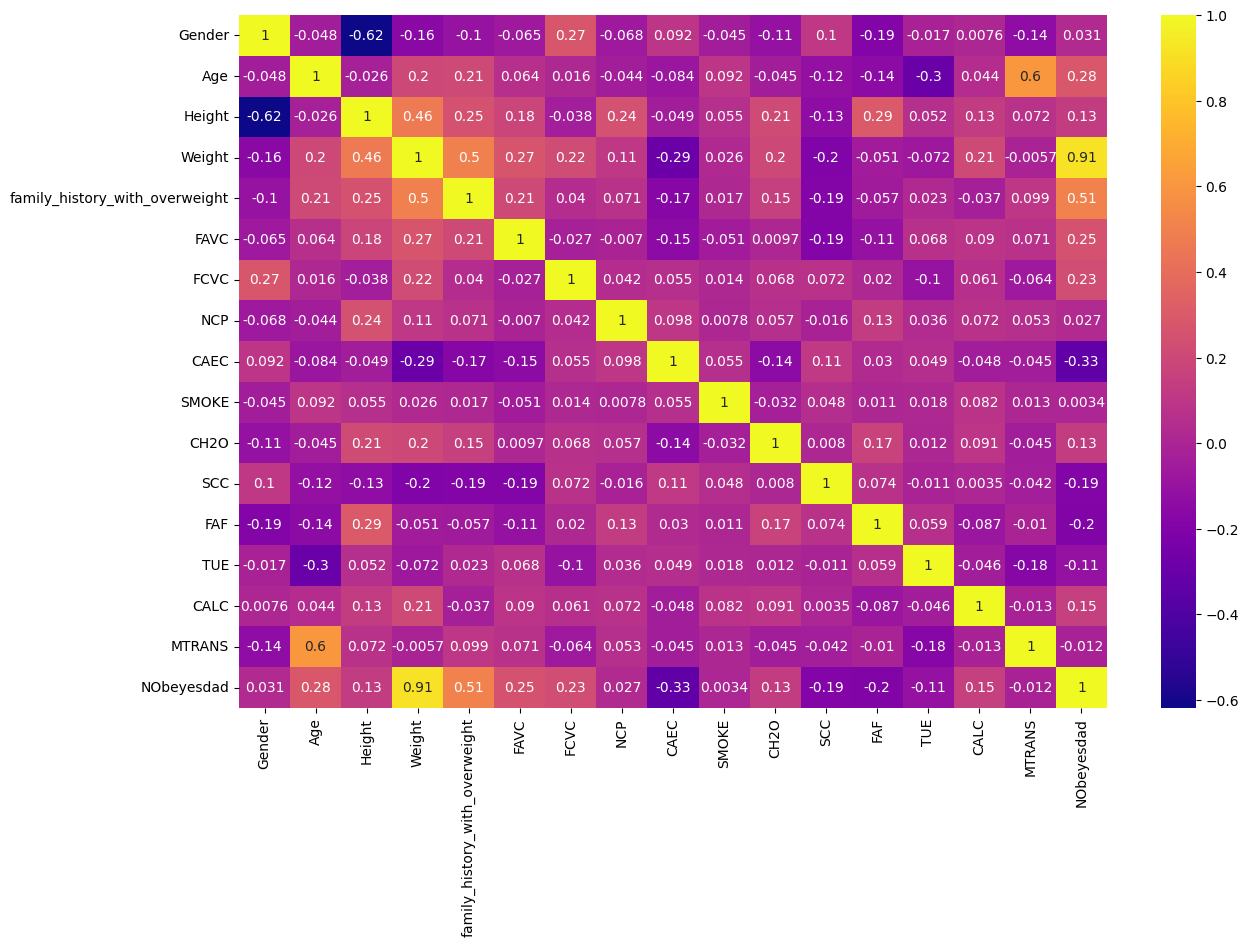

In [ ]:
corr = df_obesidad.corr(numeric_only=True)

plt.figure(figsize=(14,9))
sns.heatmap(corr, cmap= 'plasma', annot = True)

Mi matriz de correlación me esta dando resultados muy interesantes:


*   Uno de ellos es la relación del peso y la altura donde podemos ver que es bastante alto.
*   Otro es el alto valor de la relacion entre el peso y el historal familiar de obesidad, donde se evidencia que esto si puede influir en el estilo de vida de una persona.
*   Fumar con relacion al peso no tiene mucho que ver con la obesidad ya que el numero es bastante bajo.
*   La edad en relacion al peso es otra relación que no tiene mucho que ver esto debido a que depende de otros factores externos a esto.



#**8. Preparacion de datos para realizar Regresion Lineal**

**Normalizando datos**

In [ ]:
scaler = StandardScaler()

# Estandarizar todas las variables numéricas del DataFrame
df_scaled = scaler.fit_transform(df_obesidad)

# Crear un nuevo DataFrame con las variables estandarizadas
df_processed = pd.DataFrame(df_scaled, columns=df_obesidad.columns)

In [ ]:
# Variables independientes (X) y variable dependiente (y)

X = df_processed.drop(columns=['NObeyesdad'])  # Características
y = df_processed['NObeyesdad']  # Variable a predecir

df_processed.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.419172,-0.504320,-1.064334
1,1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,-0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,0.521160,-0.504320,-1.064334
2,-0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,2.461491,-0.504320,-1.064334
3,-0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,2.461491,-1.296448,-0.560452
4,-0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.521160,-0.504320,-0.056570


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Inicializando el modelo de regresión lineal y Entrenando el modelo con los datos de entrenamiento**

In [ ]:
# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

**Calcular el coeficiente de determinación (R^2) en el conjunto de prueba**

In [ ]:
r2 = modelo.score(X_test, y_test)
print("Coeficiente de determinación (R^2):", r2)


Coeficiente de determinación (R^2): 0.9475158238084375


En otras palabras, un valor de R^2 cercano a 1 indica que el modelo de regresión explica muy bien la variabilidad de la variable dependiente utilizando las variables independientes. Esto sugiere que el modelo tiene un buen ajuste a los datos y es capaz de predecir la variable dependiente con precisión.

**Valores del error cuadrático medio (MSE) y error absoluto medio (MAE)**

In [ ]:
# Predicciones del modelo en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio (MSE):", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, predicciones)
print("Error absoluto medio (MAE):", mae)


Error cuadrático medio (MSE): 0.051910844169992955
Error absoluto medio (MAE): 0.17937393943682617




*   El MSE es una medida de la calidad de una predicción numérica. Cuanto más bajo sea el valor del MSE, mejor será el rendimiento del modelo. En este caso, un MSE de aproximadamente 0.0519 indica que, en promedio, las predicciones del modelo están desviadas por 0.0519 unidades al cuadrado de los valores reales.
*   El MAE es otra medida de la precisión de una predicción numérica. Al igual que el MSE, cuanto menor sea el valor del MAE, mejor será el rendimiento del modelo. Un MAE de aproximadamente 0.179 indica que, en promedio, las predicciones del modelo están desviadas por 0.179 unidades de los valores reales.



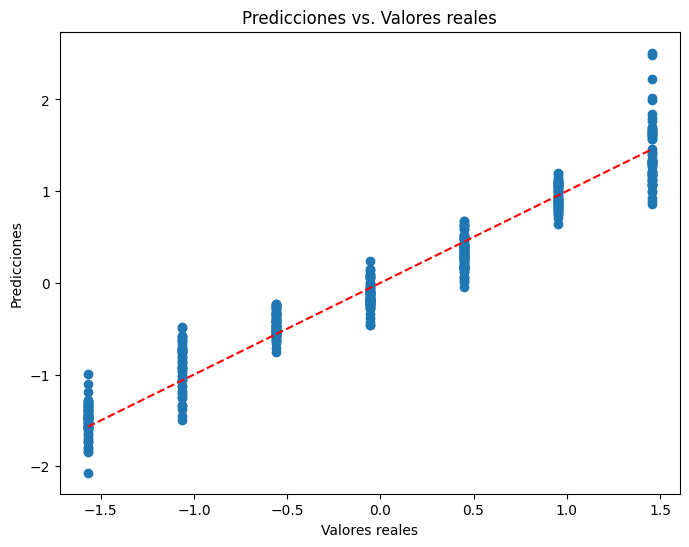

Coeficientes de regresión:
El coeficiente para la característica Gender es -0.02
El coeficiente para la característica Age es 0.07
El coeficiente para la característica Height es -0.35
El coeficiente para la característica Weight es 1.01
El coeficiente para la característica family_history_with_overweight es 0.06
El coeficiente para la característica FAVC es 0.01
El coeficiente para la característica FCVC es -0.00
El coeficiente para la característica NCP es 0.02
El coeficiente para la característica CAEC es -0.03
El coeficiente para la característica SMOKE es -0.01
El coeficiente para la característica CH2O es -0.01
El coeficiente para la característica SCC es -0.01
El coeficiente para la característica FAF es -0.03
El coeficiente para la característica TUE es -0.01
El coeficiente para la característica CALC es -0.02
El coeficiente para la característica MTRANS es -0.04
Intercepto: 0.0006591492180313284


In [ ]:
# Graficar valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicciones)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.show()

# Coeficientes de la regresión lineal
coeficientes = modelo.coef_
intercepto = modelo.intercept_

print("Coeficientes de regresión:")
for i, coef in enumerate(coeficientes):
    print(f"El coeficiente para la característica {X.columns[i]} es {coef:.2f}")

print("Intercepto:", intercepto)



**Lo anterior se hizo con los valores normalizados, ahora vamos hacerlo con los valores desnormalizados**

In [ ]:
# Tecnica para desnormalizar mis datos
mean_ = scaler.mean_
scale_ = scaler.scale_

descaler = StandardScaler()
descaler.mean_ = mean_
descaler.scale_ = scale_

desnormalized_data = descaler.inverse_transform(df_processed)
df_obesisdad_des = pd.DataFrame(desnormalized_data, columns=df_obesidad.columns)

In [ ]:
# Definir la función para clasificar el IMC
def classify_imc(value):
    if value < 18.5:
        return 'Bajo peso'
    elif 18.5 <= value < 25:
        return 'Normal'
    elif 25 <= value < 27.5:
        return 'Sobrepeso'
    elif 27.5 <= value < 30:
        return 'Preobesidad'
    elif 30 <= value < 35:
        return 'Obesidad tipo I'
    elif 35 <= value < 40:
        return 'Obesidad tipo II (severa)'
    else:
        return 'Obesidad tipo III (mórbida)'

In [ ]:
# Crear la columna de BMI
df_obesisdad_des['BMI'] = df_obesisdad_des['Weight'] / (df_obesisdad_des['Height'] ** 2)


In [ ]:
# Aplicar classify_imc para clasificar los IMCs y agregar la clasificación al DataFrame
df_obesisdad_des['BMI_group'] = df_obesisdad_des['BMI'].apply(classify_imc)

In [ ]:
# Definir X y y
X = df_obesisdad_des[['Height', 'Weight']]
y = df_obesisdad_des['BMI']

df_obesisdad_des.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_group
0,1.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,24.386526,Normal
1,1.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,1.0,24.238227,Normal
2,0.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,23.765432,Normal
3,0.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,26.851852,Sobrepeso
4,0.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,28.342381,Preobesidad


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones del modelo en el conjunto de prueba
predicciones = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio (MSE):", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, predicciones)
print("Error absoluto medio (MAE):", mae)

# Calcular R2
r2_score = model.score(X_test, y_test)
print('R²:', r2_score)

Error cuadrático medio (MSE): 0.7120549293333112
Error absoluto medio (MAE): 0.6354353662821867
R²: 0.989220460731366


**Probamos nuestro modelo para ver su respuesta**

In [ ]:
altura = 1.83  # Ejemplo de altura
peso = 105  # Ejemplo de peso

new_data = pd.DataFrame([[altura, peso]], columns=['Height', 'Weight'])

# Realizar la predicción
predicted_imc = model.predict(new_data)
print('IMC predicho:', predicted_imc[0])

# Clasificar el IMC predicho usando classify_imc
predicted_class = classify_imc(predicted_imc[0])
print('Clasificación del IMC predicho:', predicted_class)





IMC predicho: 31.749059949077775
Clasificación del IMC predicho: Obesidad tipo I


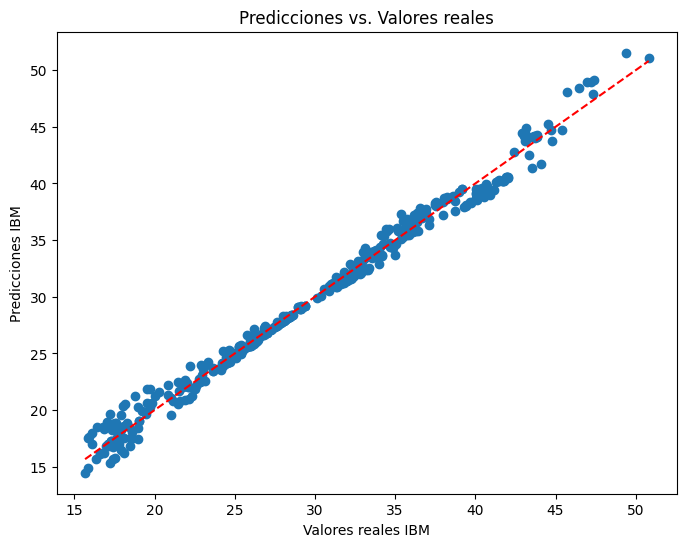

Coeficientes de regresión:
El coeficiente para la característica Height es -32.86
El coeficiente para la característica Weight es 0.34
Intercepto: 56.16760525630208


In [ ]:
# Graficar valores reales vs predicciones

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicciones)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Valores reales IBM')
plt.ylabel('Predicciones IBM')
plt.title('Predicciones vs. Valores reales')
plt.show()

# Coeficientes de la regresión lineal
coeficientes = model.coef_
intercepto = model.intercept_

print("Coeficientes de regresión:")
for i, coef in enumerate(coeficientes):
    print(f"El coeficiente para la característica {X.columns[i]} es {coef:.2f}")

print("Intercepto:", intercepto)


#**9. Clasificación usando K-means**

**Convirtiendo mis datos de caracteres a numericos**

In [ ]:
selected_columns = ['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']
X = df_obesidad[selected_columns]

categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3


**Normalizando datos**

In [ ]:


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.333333,0.0,0.5,0.0,0.000000,0.5,0.000000,0.25,0.166667
1,1.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,0.333333,1.0,1.0,1.0,1.000000,0.0,0.333333,0.25,0.166667
2,0.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.333333,0.0,0.5,0.0,0.666667,0.5,0.666667,0.25,0.166667
3,0.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.333333,0.0,0.5,0.0,0.666667,0.0,0.666667,0.00,0.333333
4,0.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.333333,0.0,0.5,0.0,0.000000,0.0,0.333333,0.25,0.500000


**Para determinar el numero óptimo de clusters usamos el metodo del codo**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

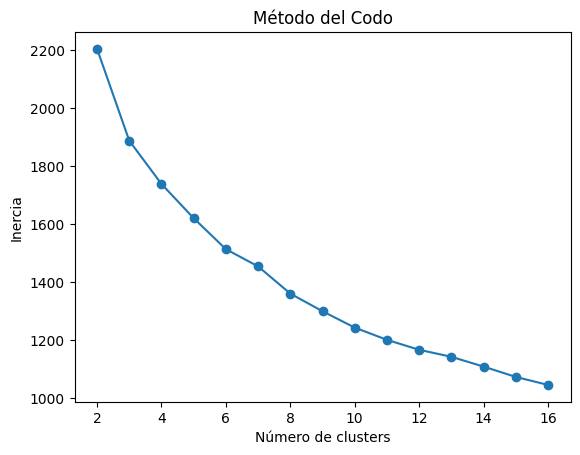

In [ ]:
inertias = []
for k in range(2, 17):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficar la inercia vs. el número de clusters

plt.plot(range(2, 17), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

**Escogemos el numero optimo de clusters**

In [ ]:
# Escogemos que el numero de clusters va ser de 6

optimal_k = 6

#Modelo KMeans de entrenamiento

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=50, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

cluster_labels = kmeans.labels_

df_obesidad['Cluster'] = cluster_labels

**Aplicamos PCA**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



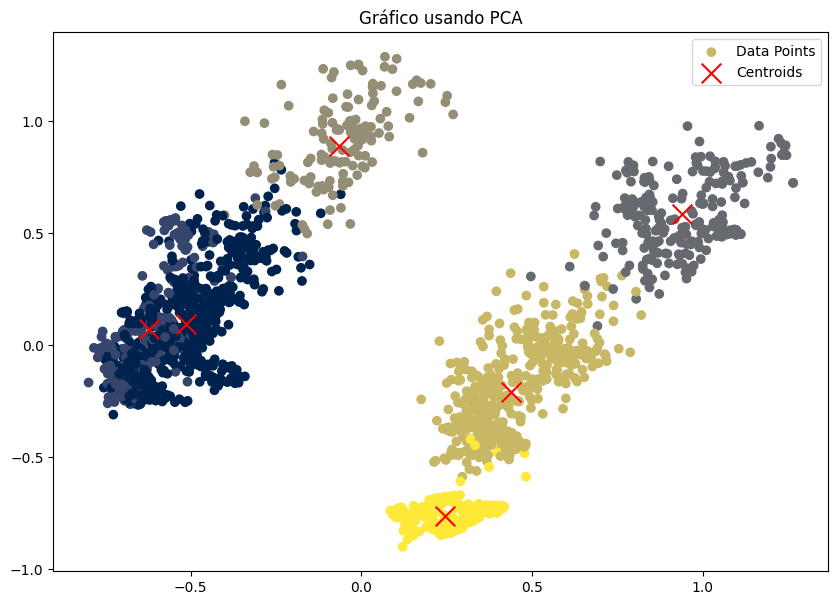

In [ ]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='cividis', marker='o', label='Data Points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Gráfico usando PCA')
plt.legend()
plt.show()

In [ ]:
df_obesidad['Cluster_Label'] = df_obesidad['Cluster'].replace([0,1,2,3,4,5],['Riesgo Bajo','Riesgo Medio','Riesgo Moderado','Riesgo Moderado Alto', 'Riesgo Alto', 'Riesgo Critico'])

In [ ]:
df_obesidad.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster,Cluster_Label
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,1,4,Riesgo Alto
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1,4,Riesgo Alto
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,1,0,Riesgo Bajo
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2,3,Riesgo Moderado Alto
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3,3,Riesgo Moderado Alto


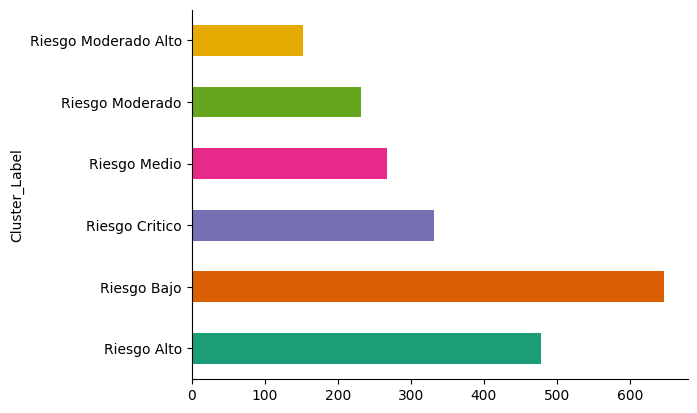

In [ ]:
df_obesidad.groupby('Cluster_Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#**10. Conclusión**







*   Como conclusion del proyecto tenemos la correcta visualizacion de gráficas necesarias para entender el contexto del dataset, ya que tenemos 17 columnas de las cuales la mayoria aportan información muy valiosa que podemos usar y transformar de ser necesario para elaborar nuestro EDA.
*   El metodo de regresion lineal para realziar la predicción segun las 2 variables estudiadas y la variable a predecir fue el adecuado obteniendo resultados muy buenos y su posterior clasificación.
*   Para clasificar las personas segun su nivel de obesidad usamos el cluster KMeans que nos arrojo una buena separacion de caracteristicas en comun dandonos el numero de cluster de 6 que se dedujo a partir del metodo del codo en la grafica realizada.



#**11. Bibiliografía**

1.      "Regresión Lineal," EBAC Blog. [En línea]. Disponible: https://ebac.mx/blog/regreson-lineal.

2.       "K-Means," Universidad de Oviedo. [En línea]. Disponible: https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html.

3.       "¿Qué es el Clustering?," Graph Everywhere. [En línea]. Disponible: https://www.grapheverywhere.com/que-es-el-clustering/.

4.       "Representación Gráfica en el Análisis de Datos," Fisterra. [En línea]. Disponible: https://www.fisterra.com/formacion/metodologia-investigacion/representacion-grafica-analisis-datos/.

5.        "Vídeo: Análisis Exploratorio de Datos con Python," YouTube. [En línea]. Disponible: https://www.youtube.com/watch?v=0jhMLYKCVWE.

6.        "Lección de Python para Ecología - Data Carpentry," Data Carpentry. [En línea]. Disponible: https://datacarpentry.org/python-ecology-lesson-es/.

7.       "Análisis Exploratorio de Datos con Python," Kaggle. [En línea]. Disponible: https://www.kaggle.com/code/abonaplata/analisis-exploratorio-de-datos-con-python#5.-Comprobación-de-normalidad.
